<h1>Visualise Machine Learning</h1>

<h2>Imports</h2>

In [133]:
import numpy as np
import matplotlib
import functools
import pprint
import scipy

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from functools import partial
from scipy import optimize as opt

%reload_ext blackcellmagic


<h2>Regressor</h2>

In [251]:
def regression(data):
    dim = np.shape(data)
    b = np.zeros_like(data[0, :])

    def linReg(data, const):
        const = np.array(const)
        y = np.sum(const[1:] * data[:, :-1], axis=1) + const[0]
        return sum((y - data[:, -1]) ** 2)

    c = opt.fmin(lambda beta: linReg(data, beta), b, disp=False)

    return c


regression(data)

<h2>Data Set 1</h2>

[-202.0694131    59.08743863   11.1004377 ]


/tmp/ipykernel_17650/2926487792.py:29: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


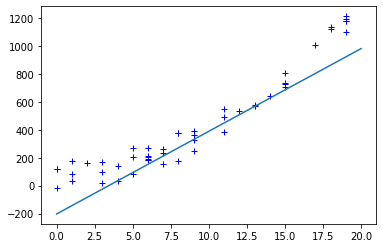

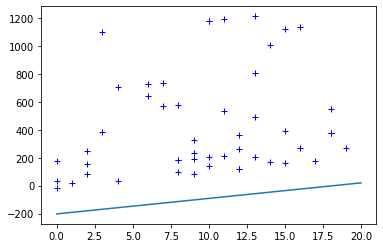

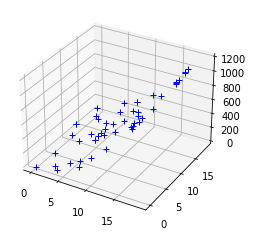

In [252]:
def trueFunction(x):
    return 3*x[0]**2 - 15 + 11*x[1]

def getFunction(f, x):
    return [*x, f(x) + np.random.normal()]

func = partial(getFunction, trueFunction)
data = np.array(
    [func([np.random.randint(0, 20), np.random.randint(0, 20)])
     for i in range(50)]
)



const = regression(data)
print(const)

for i, c in enumerate(const[1:]):
    plt.figure()
    plt.plot(data[:, i], data[:, -1], 'b+')
    x = np.linspace(0, 20)
    plt.plot(x, const[0] + const[i+1] * x)

#plt.figure()
#plt.plot(data[:, 1], data[:, 2], 'b+')
#plt.plot(x, const[0] + const[2] * x)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(*data.transpose(), 'b+', label='parametric curve')



In [48]:
pprint.pprint((data[0,1:]))

array([  4.        , -21.33788279])
